In [ ]:
#!git clone https://github.com/qununc/MLbase_2021_spring.git

In [ ]:
#!pip install -U scikit-learn

In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import time


In [2]:
df = pd.read_csv('weatherAUS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
46163,2009-05-30,Canberra,1.3,13.6,0.0,1.8,1.9,ESE,39.0,ESE,...,78.0,53.0,1030.6,1029.6,4.0,7.0,7.6,12.5,No,No
18633,2010-06-03,NorahHead,13.3,19.5,1.8,NaN,NaN,SSE,70.0,SW,...,90.0,83.0,1021.9,1018.7,NaN,NaN,15.5,18.4,Yes,Yes
123614,2016-11-21,Perth,10.2,21.8,0.0,7.4,12.6,SSW,37.0,ESE,...,49.0,40.0,1020.9,1018.2,7.0,6.0,17.3,20.5,No,No
40587,2011-12-16,Williamtown,11.3,22.9,0.0,NaN,NaN,SE,39.0,SW,...,70.0,51.0,1021.3,1020.8,8.0,2.0,18.8,20.6,No,No
106916,2012-10-16,Woomera,17.9,30.9,0.0,18.2,9.7,SSE,50.0,S,...,41.0,13.0,1016.7,1014.3,4.0,2.0,20.9,30.4,No,No
33079,2016-04-11,Sydney,16.1,26.5,0.0,6.4,9.4,WSW,31.0,WNW,...,51.0,46.0,1017.5,1016.4,3.0,6.0,19.6,24.1,No,Yes
79520,2013-06-09,Watsonia,2.4,13.7,0.0,1.6,6.6,NNW,31.0,ENE,...,99.0,58.0,1027.1,1023.6,7.0,7.0,4.2,13.0,No,No
37950,2013-01-22,WaggaWagga,17.9,37.6,0.0,10.0,13.4,WSW,54.0,NNE,...,43.0,5.0,1008.7,1006.2,1.0,1.0,26.7,36.6,No,No
33183,2016-07-24,Sydney,7.8,14.3,0.0,4.0,5.4,WSW,46.0,W,...,50.0,39.0,1015.8,1012.1,7.0,2.0,8.7,13.6,No,No
126322,2016-02-02,SalmonGums,7.0,23.9,0.0,NaN,NaN,S,46.0,SW,...,57.0,47.0,NaN,NaN,NaN,NaN,17.1,20.8,No,No


In [4]:
df['Sunshine'].dropna().hist()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.isna().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [7]:
df[['Pressure9am', 'Pressure3pm']].hist()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([[<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>]], dtype=object)

In [8]:
weather_df = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']).dropna()
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  object 
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RainTomorrow   112925 non-nul

In [9]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
weather_df['Location'] = labelencoder.fit_transform(weather_df['Location'])
weather_df['WindGustDir'] = labelencoder.fit_transform(weather_df['WindGustDir'])
weather_df['WindDir9am'] = labelencoder.fit_transform(weather_df['WindDir9am'])
weather_df['RainToday'] = labelencoder.fit_transform(weather_df['RainToday'])
weather_df['RainTomorrow'] = labelencoder.fit_transform(weather_df['RainTomorrow'])
weather_df['WindDir3pm'] = labelencoder.fit_transform(weather_df['WindDir3pm'])
# weather_df = weather_df[].apply(le.fit_transform)

In [10]:
weather_df.hist()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(weather_df.drop(['RainTomorrow'], axis=1), weather_df['RainTomorrow'], test_size=0.25, shuffle=False)
weather_df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
133476,16,15.9,26.5,0.0,6,35.0,7,7,7.0,17.0,83.0,47.0,1024.1,1020.1,19.2,25.6,0,0
73286,19,19.9,37.7,0.0,10,39.0,9,2,9.0,11.0,35.0,15.0,1017.4,1015.1,25.3,35.4,0,0
115369,26,15.3,31.4,0.0,12,41.0,10,12,24.0,28.0,39.0,32.0,1010.9,1008.1,22.9,28.7,0,0
33309,32,19.6,23.5,0.0,9,35.0,9,2,19.0,22.0,71.0,66.0,1017.8,1016.9,20.5,21.6,0,0
34487,33,13.1,17.3,22.8,2,65.0,2,10,43.0,41.0,81.0,75.0,1019.2,1020.4,14.6,14.9,1,1
103343,25,8.0,21.6,0.0,9,52.0,0,9,22.0,6.0,60.0,37.0,1019.0,1016.5,11.7,20.0,0,0
122199,27,11.6,26.5,0.0,15,33.0,0,12,9.0,20.0,49.0,46.0,1022.1,1019.2,19.8,23.9,0,0
1861,1,14.9,19.6,9.0,9,48.0,10,9,11.0,9.0,95.0,88.0,1019.0,1017.7,14.9,17.7,1,1
58381,5,0.9,12.1,0.2,7,28.0,14,14,9.0,15.0,100.0,84.0,1023.4,1022.2,6.5,11.6,0,1
35454,33,9.4,20.5,0.2,14,59.0,6,7,20.0,41.0,44.0,25.0,1012.4,1008.4,14.8,19.4,0,0


In [12]:
weather_df['Location'].unique()

array([ 1,  3,  9, 10, 20, 23, 24, 30, 32, 33, 37, 40, 42,  8, 35,  4,  5,
       31, 18, 17, 19, 22, 29, 39, 11,  6,  7, 13, 34,  0, 21, 25, 43, 41,
       26, 28, 27, 38, 14, 16,  2, 12, 15, 36])

In [13]:
import sklearn.naive_bayes

classifier = sklearn.naive_bayes.MultinomialNB()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [14]:
%%time

classifier = sklearn.naive_bayes.GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
classifier.score(X_test, y_test)

Wall time: 100 ms


0.8451402663644092

In [15]:
%%time

classifier = sklearn.naive_bayes.BernoulliNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
classifier.score(X_test, y_test)

Wall time: 78 ms


0.7967554548030603

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)
neigh.score(X_test, y_test)

0.7971450835930859

In [ ]:
neigh.score(X_test, y_test)

In [102]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

In [103]:
neigh.score(X_test, y_test)

0.8459903655426466

In [27]:
%%time

n_nb = range(1, 10)
res = []

for i in n_nb: 
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    prediction = neigh.predict(X_test)

    res.append((np.mean(prediction == y_test)))

Wall time: 8min 22s


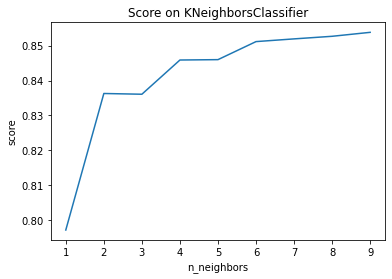

In [28]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()